<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center"> Linear Regression (Tips)</h3>
    <h4 align="center"><a href="https://github.com/AliBinary">Ali Ghanbari</a></h5>
</div>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=sns.load_dataset('tips')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.sample(5)

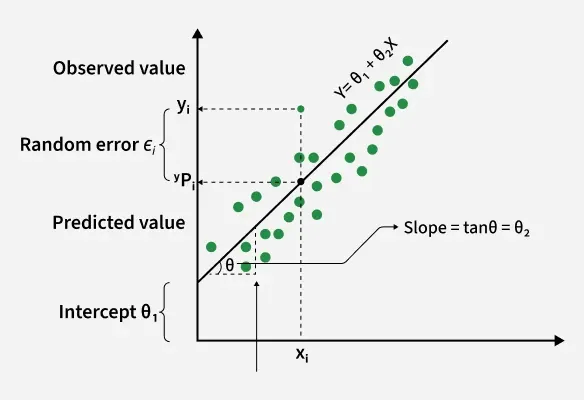

In [ ]:
df.groupby('day').count()

In [ ]:
df2=df.groupby('day').count() # sum per day
df2.drop('size',inplace=True,axis=1) # sum of size column is not relevant
df2['percent'] = df2['tip']/df2['total_bill']*100 # add percents
df2

In [ ]:
df3=df.groupby('smoker').count()
df3['percent'] = df3['tip']/df3['total_bill']*100
df3

In [ ]:
df4= df.groupby(['day','size']).count()
df4['percent'] = df4['tip']/df4['total_bill']*100
df4.dropna() # drop null rows
df4

In [ ]:
sns.catplot(x='day' ,kind="count",data=df)

In [ ]:
sns.catplot(x='day' ,hue="size",kind="count", data=df)

## convert sex and smoker columns to values

In [ ]:
df

In [ ]:
df.replace({ 'sex': {'Male':0 , 'Female':1} , 'smoker' : {'No': 0 , 'Yes': 1}} ,inplace=True)
# df = df.replace({ 'sex': {'Male':0 , 'Female':1} , 'smoker' : {'No': 0 , 'Yes': 1}} )

df.head()

In [ ]:
days=pd.get_dummies(df['day'])
days.sample(5)

In [ ]:
days=pd.get_dummies(df['day'])
df = pd.concat([df,days],axis=1)

In [ ]:
times=pd.get_dummies(df['time'])
df = pd.concat([df,times],axis=1)

In [ ]:
df

In [ ]:
type(df)

In [ ]:
my_correlation = df[['total_bill', 'tip', 'sex', 'size']].corr()
sns.heatmap(my_correlation,annot=True)

In [ ]:
X = df[['total_bill','size']]
Y = df[['tip']]

In [ ]:
X

In [ ]:
Y

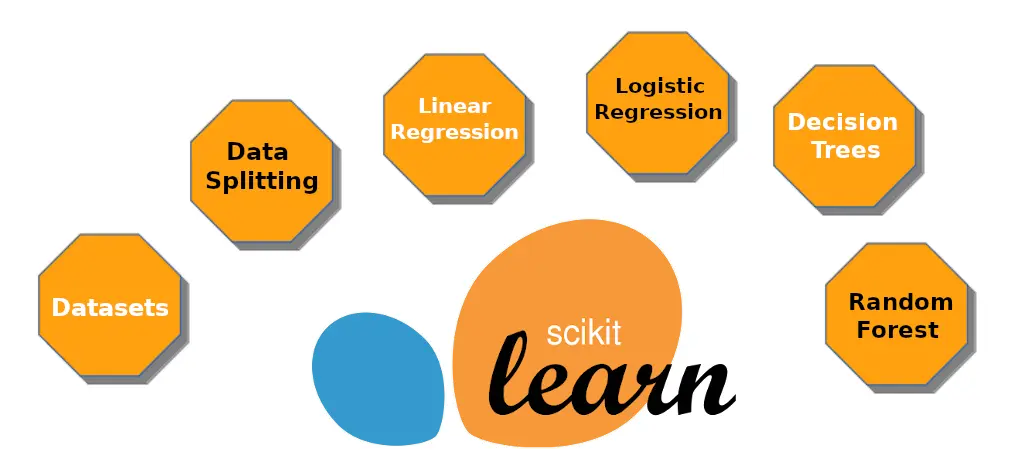

In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=26)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
predictions=regressor.predict(X_test)

In [ ]:
X_test

In [ ]:
predictions[0]

In [ ]:
y_test

In [ ]:
sns.histplot(y_test-predictions)

### 1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors. It is calculated as:

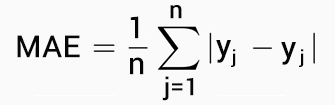

###  2. Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:

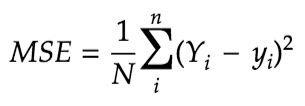

###  3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

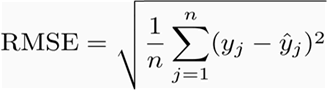

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

## New Data

In [ ]:
X.head()

## new_customer

In [ ]:
new_customer = np.array([16.99,2]).reshape(1,-1)
regressor.predict(new_customer)

In [ ]:
regressor.coef_

In [ ]:
regressor.intercept_

In [ ]:
regressor.score